In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt



In [3]:
resnet_model=Sequential()


In [4]:
pre_train_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(256, 256, 3),
    pooling='avg'  # Global average pooling instead of Flatten
)

# Freeze the layers of the pre-trained ResNet50 model
for layer in pre_train_model.layers:
    layer.trainable = False

# Create a new model
resnet_model = Sequential()
resnet_model.add(pre_train_model)

# Add additional layers
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))  # Dropout layer for regularization
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.5))  # Dropout layer for regularization
resnet_model.add(Dense(4, activation='softmax'))

# Compile the model
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),  # Experiment with different learning rates
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                

In [5]:

images=tf.data.Dataset.list_files('/mnt/c/Users/Jim/Desktop/data/*/*')
for image in images.take(3):
    print(image)
    
image_count=len(images)
print(image_count)

tf.Tensor(b'/mnt/c/Users/Jim/Desktop/data/Keyboard/V08G0Y8JMX8I.png', shape=(), dtype=string)
tf.Tensor(b'/mnt/c/Users/Jim/Desktop/data/Dvdreader/27-106-116-V06.png', shape=(), dtype=string)
tf.Tensor(b'/mnt/c/Users/Jim/Desktop/data/Mouse/K67NHZOUYAT0.png', shape=(), dtype=string)
2328


2023-06-03 14:16:52.473853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2328]
	 [[{{node Placeholder/_0}}]]
2023-06-03 14:16:52.474205: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2328]
	 [[{{node Placeholder/_0}}]]


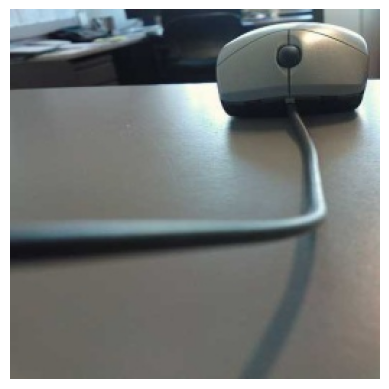

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image file
image = mpimg.imread("/mnt/c/Users/Jim/Desktop/data/Mouse/08WBAV853XST.png")

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
from PIL import Image
import numpy as np
import os

folder_path = "/mnt/c/Users/Jim/Desktop/data/Mouse/"  # Replace with the path to your folder

# Get a list of all PNG files in the folder
png_files = [file for file in os.listdir(folder_path) if file.endswith(".png")]

# Iterate over each PNG file
for file_name in png_files:
    # Open the image file
    file_path = os.path.join(folder_path, file_name)
    image = Image.open(file_path)

    # Convert the image to a NumPy array
    image_array = np.array(image)

    # Process the image array as needed
    # ...

    # Print the shape and data type of the array
#     print("Array shape:", image_array.shape)
#     print("Array data type:", image_array.dtype)
# #     print(image_array)

In [9]:
import tensorflow as tf

# Specify the directory containing the images
data_dir = "/mnt/c/Users/Jim/Desktop/data/"

# Create a TensorFlow dataset from the directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    seed=42,
    subset="training"
)


Found 2328 files belonging to 4 classes.
Using 1863 files for training.


In [10]:
# Specify the directory containing the images
data_dir_test = "/mnt/c/Users/Jim/Desktop/Test/"

# Create a TensorFlow dataset from the directory
ds_test = tf.keras.utils.image_dataset_from_directory(
    data_dir_test,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=29,
    # validation_split=0.2,
    # subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 40 files belonging to 4 classes.


In [11]:
ds_training = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=29,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 2328 files belonging to 4 classes.
Using 1863 files for training.


In [10]:
ds_training.class_names

['Dvdreader', 'Keyboard', 'Mouse', 'Screen']

In [13]:
ds_validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=29,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2328 files belonging to 4 classes.
Using 465 files for validation.


In [16]:
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=3, monitor="val_accuracy", restore_best_weights=True)

history = resnet_model.fit(ds_training, validation_data=ds_validation, epochs=10, callbacks=[es],batch_size=32)

Epoch 1/10


2023-06-03 14:28:16.968282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1863]
	 [[{{node Placeholder/_4}}]]
2023-06-03 14:28:16.969208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1863]
	 [[{{node Placeholder/_4}}]]


43/59 [====================>.........] - ETA: 48s - loss: 0.2693 - accuracy: 0.8968

In [15]:
def plot_loss_accuracy(history):

    with plt.style.context('seaborn-deep'):

        fig, ax = plt.subplots(1, 2, figsize=(15, 4))

        ## Plot Losses and Accuracies
        x_axis = np.arange(len(history.history['loss']))

        ax[0].set_title("Loss")
        ax[0].plot(x_axis, history.history['loss'], color="blue", linestyle=":", marker="X", label="Train Loss")
        ax[0].plot(x_axis, history.history['val_loss'], color="orange", linestyle="-", marker="X", label="Val Loss")

        ax[1].set_title("Accuracy")
        ax[1].plot(x_axis, history.history['accuracy'], color="blue", linestyle=":", marker="X", label="Train Accuracy")
        ax[1].plot(x_axis,
                   history.history['val_accuracy'],
                   color="orange",
                   linestyle="-",
                   marker="X",
                   label="Val Accuracy")

        ## Customization
        ax[0].grid(axis="x", linewidth=0.5)
        ax[0].grid(axis="y", linewidth=0.5)
        ax[0].legend()
        ax[1].grid(axis="x", linewidth=0.5)
        ax[1].grid(axis="y", linewidth=0.5)
        ax[1].legend()

        plt.show()

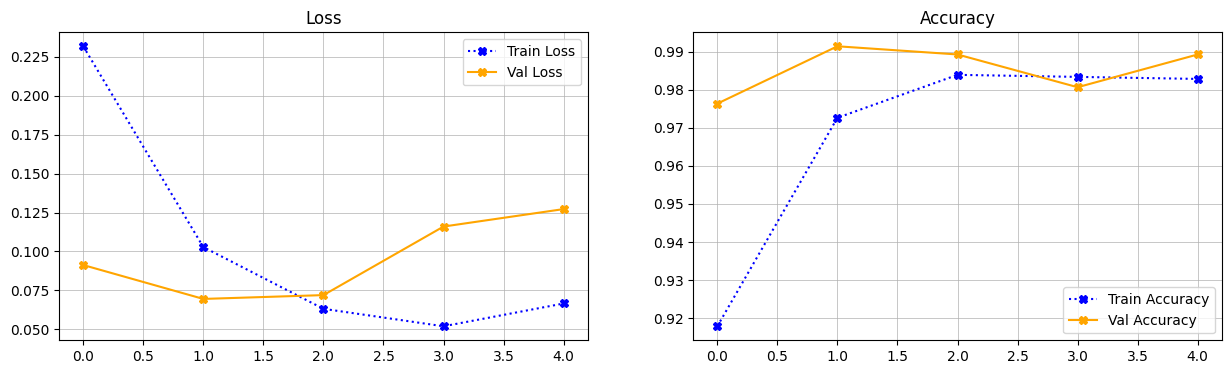

In [14]:
plot_loss_accuracy(history)